In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('crypto_price_comparisons.db')

bitcoin_prices = pd.read_csv('bitcoin_price_history.csv')
ethereum_prices = pd.read_csv('ethereum_price.csv')
ripple_prices = pd.read_csv('ripple_price.csv')
dash_prices = pd.read_csv('dash_price.csv')
litecoin_prices = pd.read_csv('litecoin_price.csv')

bitcoin_prices.to_sql('bitcoin_prices', conn, if_exists='replace')
ethereum_prices.to_sql('ethereum_prices', conn, if_exists='replace')
ripple_prices.to_sql('ripple_prices', conn, if_exists='replace')
dash_prices.to_sql('dash_prices', conn, if_exists='replace')
litecoin_prices.to_sql('litecoin_prices', conn, if_exists='replace')

/Users/danielcarter/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2531: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype, method=method)


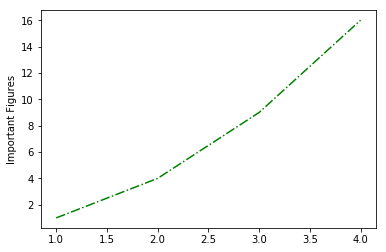

In [2]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], color='green', linestyle='dashdot')
plt.ylabel('Important Figures')
plt.show()

       Open
0  11231.80
1  10552.60
2  11123.40
3  10207.50
4  10135.70
5   9488.32
6   8599.92
7   8926.72
8   8141.43
9   8616.13
0    943.57
1    921.67
2    973.35
3    944.75
4    934.79
5    923.73
6    844.28
7    869.29
8    817.51
9    859.29


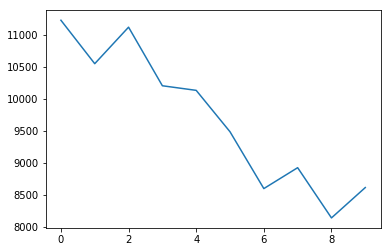

In [3]:
bitcoin_query = pd.read_sql_query("""
   SELECT Open FROM bitcoin_prices LIMIT 10;
""", conn)

ethereum_query = pd.read_sql_query("""
    SELECT Open FROM ethereum_prices LIMIT 10;
""", conn)

bitcoin_combined = bitcoin_query.append(ethereum_query)

bitcoin_chart = print(bitcoin_combined)

plt.plot(bitcoin_query)

#bitcoin_query.set_xlim([0, 10])
#bitcoin_query.set_ylim([0, 12000])

plt.show()



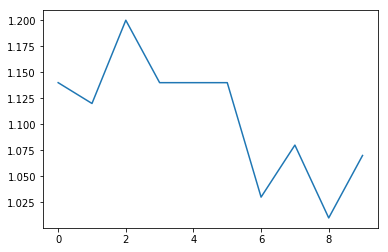

In [4]:
ripple_query = pd.read_sql_query("""
    SELECT Open FROM ripple_prices LIMIT 10;
""", conn)

plt.plot(ripple_query)
plt.show()

              Date   Open
0     Apr 01, 2014  12.77
1     Apr 01, 2015   1.65
2     Apr 01, 2016   3.25
3     Apr 01, 2017   6.65
4     Apr 02, 2014  13.09
5     Apr 02, 2015   1.67
6     Apr 02, 2016   3.25
7     Apr 02, 2017   6.86
8     Apr 03, 2014  11.26
9     Apr 03, 2015   1.68
10    Apr 03, 2016   3.26
11    Apr 03, 2017   7.74
12    Apr 04, 2014  11.07
13    Apr 04, 2015   1.70
14    Apr 04, 2016   3.26
15    Apr 04, 2017   8.12
16    Apr 05, 2014  11.00
17    Apr 05, 2015   1.68
18    Apr 05, 2016   3.25
19    Apr 05, 2017   8.25
20    Apr 06, 2014  11.18
21    Apr 06, 2015   1.70
22    Apr 06, 2016   3.26
23    Apr 06, 2017  11.12
24    Apr 07, 2014  11.66
25    Apr 07, 2015   1.69
26    Apr 07, 2016   3.26
27    Apr 07, 2017  10.22
28    Apr 08, 2014  11.21
29    Apr 08, 2015   1.67
...            ...    ...
1730  Sep 25, 2013   2.47
1731  Sep 25, 2014   4.67
1732  Sep 25, 2015   2.93
1733  Sep 25, 2016   3.80
1734  Sep 25, 2017  47.62
1735  Sep 26, 2013   2.37
1736  Sep 26

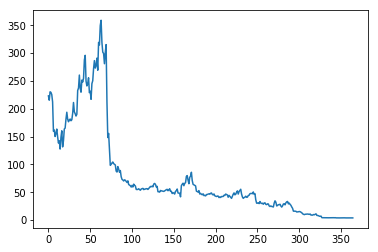

In [5]:
litecoin_query = pd.read_sql_query("""
    SELECT Date, Open FROM litecoin_prices ORDER BY Date;
""", conn)

print(litecoin_query)

litecoin_data_query = pd.read_sql_query("""
    SELECT Open FROM litecoin_prices LIMIT 365;
""", conn)

plt.plot(litecoin_data_query)
plt.show()

In [8]:
dash_query = pd.read_sql_query("""
    SELECT STRFTIME("%Y/%m/%d", Date) AS Date2, Open FROM dash_prices LIMIT 365;
""", conn)

print(dash_query)

#pd.read_sql_query("""
    #SELECT STRFTIME("%Y/%m/%d", Date) AS Date2, Open FROM dash_prices LIMIT 365;
#""", conn)

    Date2    Open
0    None  728.99
1    None  687.70
2    None  744.09
3    None  699.13
4    None  702.53
5    None  679.79
6    None  593.59
7    None  622.12
8    None  582.83
9    None  633.43
10   None  639.42
11   None  606.76
12   None  520.91
13   None  524.70
14   None  454.17
15   None  545.32
16   None  637.01
17   None  589.17
18   None  616.62
19   None  698.79
20   None  678.93
21   None  767.73
22   None  811.84
23   None  777.05
24   None  782.87
25   None  793.92
26   None  788.77
27   None  757.11
28   None  763.13
29   None  825.69
..    ...     ...
335  None   95.68
336  None   99.91
337  None  108.16
338  None  107.55
339  None  101.04
340  None   89.56
341  None   95.42
342  None   89.06
343  None   74.61
344  None   76.96
345  None   72.71
346  None   50.40
347  None   51.09
348  None   42.24
349  None   45.55
350  None   46.57
351  None   42.22
352  None   43.14
353  None   47.17
354  None   44.04
355  None   42.47
356  None   32.62
357  None   28.24
358  None 